In [33]:
import pandas as pd
import requests
import csv
from datetime import datetime

Import Ameriflux dataset for Eight Mile Lake

In [45]:
emlamf= pd.read_csv("C:/Users/vbriones/Desktop/Sentinel_Site_Data/AK/EML/AK_EML_AMF_2008_2020.csv",skiprows=2,na_values={'-9999','NaN'} )
     
    

In [46]:
emlamf.head()

,TIMESTAMP_START,TIMESTAMP_END,CO2,H2O,WS,WD,USTAR,MO_LENGTH,TAU,W_SIGMA,...,SWC_2_1_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,V_SIGMA
0,200801010000,200801010030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200801010030,200801010100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200801010100,200801010130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200801010130,200801010200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200801010200,200801010230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert TimeStamp string to date format

In [47]:
emlamf['TIMESTAMP_START'] = emlamf['TIMESTAMP_START'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M'))
emlamf['TIMESTAMP_END'] = emlamf['TIMESTAMP_END'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M'))

In [43]:
emlamf.head()

,TIMESTAMP_START,TIMESTAMP_END,CO2,H2O,WS,WD,USTAR,MO_LENGTH,TAU,W_SIGMA,...,SWC_2_1_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,V_SIGMA
0,2008-01-01 00:00:00,200801010030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-01-01 00:30:00,200801010100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-01-01 01:00:00,200801010130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-01-01 01:30:00,200801010200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-01-01 02:00:00,200801010230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extract DOY and Year from date

In [48]:
emlamf["doy"]=emlamf['TIMESTAMP_START'].dt.dayofyear
emlamf["year"]=emlamf['TIMESTAMP_START'].dt.year

In [49]:
 emlamf.head()

,TIMESTAMP_START,TIMESTAMP_END,CO2,H2O,WS,WD,USTAR,MO_LENGTH,TAU,W_SIGMA,...,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,V_SIGMA,doy,year
0,2008-01-01 00:00:00,2008-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2008
1,2008-01-01 00:30:00,2008-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2008
2,2008-01-01 01:00:00,2008-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2008
3,2008-01-01 01:30:00,2008-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2008
4,2008-01-01 02:00:00,2008-01-01 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2008


Print and view column/variable names within dataset

In [66]:
for col in emlamf.columns:
    print(col)

TIMESTAMP_START
TIMESTAMP_END
CO2
H2O
WS
WD
USTAR
MO_LENGTH
TAU
W_SIGMA
U_SIGMA
PA
TA
T_SONIC
VPD_PI
RH
SWC
TS
ALB
NETRAD
PPFD_IN
SW_IN
SW_OUT
LW_IN
LW_OUT
D_SNOW
FC
LE
H
SC
NEE_PI_F
RECO_PI_F
GPP_PI_F
FCH4
FCH4_SSITC_TEST
FC_SSITC_TEST
TAU_SSITC_TEST
H_SSITC_TEST
LE_SSITC_TEST
CH4
ZL
FETCH_70
FETCH_90
FETCH_MAX
RH_PI_F
PA_PI_F
TA_PI_F
PPFD_IN_PI_F
SW_IN_PI_F
NETRAD_PI_F
SWC_1_1_1
SWC_2_1_1
TS_1_1_1
TS_1_2_1
TS_1_3_1
TS_1_4_1
TS_2_1_1
TS_2_2_1
TS_2_3_1
TS_2_4_1
V_SIGMA
doy
year


Check variables by plotting

<AxesSubplot:>

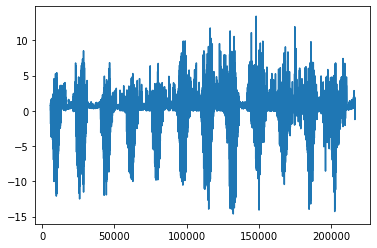

In [67]:
emlamf.NEE_PI_F.plot()

,CO2,H2O,WS,WD,USTAR,MO_LENGTH,TAU,W_SIGMA,U_SIGMA,PA,...,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,V_SIGMA,doy,year
count,119932.000000,128333.000000,155207.000000,153525.000000,128093.000000,1.261480e+05,1.297780e+05,96648.000000,96322.000000,132740.000000,...,57132.000000,57133.000000,57133.000000,57135.000000,13857.000000,57107.000000,57134.000000,19330.000000,216191.000000,216191.000000
mean,394.506095,5.901392,2.699847,167.064698,0.190118,5.571531e+01,-3.944871e-02,0.239957,0.811978,93.198374,...,2.612004,-0.120098,-0.597353,3.959729,2.193841,0.134893,-0.322264,0.826394,179.844633,2013.673594
std,48.341115,4.614806,2.105748,85.154530,0.146135,1.488712e+04,1.531767e-01,0.170442,0.555160,1.064438,...,6.454953,2.072166,1.232673,9.182424,3.852477,1.838972,0.936258,0.507278,106.025563,3.563990
min,223.064000,0.000754,0.000000,0.000000,0.000160,-3.300000e+06,-3.812460e+00,0.000000,0.000000,88.744570,...,-9.030000,-6.362000,-4.730000,-22.772817,-5.910129,-4.806393,-4.043252,0.067007,1.000000,2008.000000
25%,373.587954,2.351230,1.300000,92.540370,0.080790,-2.263325e-01,-6.450000e-02,0.102470,0.400143,92.565822,...,-1.737930,-0.874147,-0.762460,-2.253133,-0.153720,-0.667000,-0.487892,0.431531,87.000000,2011.000000
50%,394.239441,4.604021,2.129310,169.769300,0.151400,4.104000e-02,-1.479830e-02,0.202880,0.668115,93.237405,...,-0.012335,-0.006000,-0.214773,-0.066206,2.758338,-0.091300,-0.200987,0.714306,178.000000,2014.000000
75%,408.856015,8.613128,3.535497,240.194000,0.263690,2.769767e+00,-1.000000e-08,0.337753,1.081507,93.888095,...,6.781092,1.273368,0.002204,9.307705,5.063467,1.434827,-0.062000,1.106712,272.000000,2017.000000
max,12735.930600,60.716311,33.296540,359.998700,6.752240,2.490000e+06,1.020090e+01,3.424980,13.320200,98.140750,...,35.232667,9.741850,1.525000,45.451523,20.980267,6.149277,13.124581,6.273215,366.000000,2020.000000


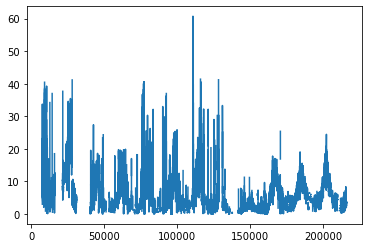

In [65]:
emlamf.H2O.plot()


count    119932.000000
mean        394.506095
std          48.341115
min         223.064000
25%         373.587954
50%         394.239441
75%         408.856015
max       12735.930600
Name: CO2, dtype: float64

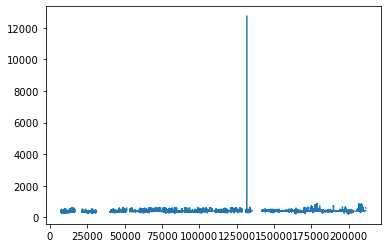

In [53]:
emlamf.CO2.plot()
emlamf.CO2.describe()
#Appears to be an outlier value for CO2

In [55]:
#locate single outlier value in dataset
emlamf.loc[emlamf['CO2'] == 12735.930600]

,TIMESTAMP_START,TIMESTAMP_END,CO2,H2O,WS,WD,USTAR,MO_LENGTH,TAU,W_SIGMA,...,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,V_SIGMA,doy,year
131831,2015-07-09 11:30:00,2015-07-09 12:00:00,12735.9306,1.980017,2.389909,325.011871,0.201015,-77.891179,-0.0456,NaN,...,10.865883,1.065776,-0.222195,13.328873,4.046466,0.37445,-0.291601,NaN,190,2015


In [61]:
#remove single outlier row from dataset
emlamf2 = emlamf.drop(labels=131831, axis=0)

<AxesSubplot:>

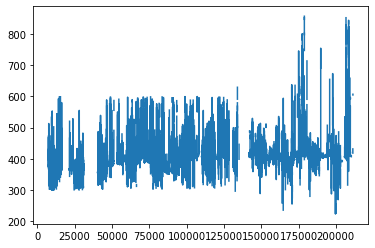

In [62]:
emlamf2.CO2.plot()

Export processed csv when needed

In [68]:
#emlamf2.to_csv('AK_EML_AMF_2008_2020pp.csv')